<a href="https://colab.research.google.com/github/Percy-O/Ads-Click-Predicition/blob/main/Ads_Click_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Importing Libraries



In [ ]:
import numpy as np # MAthematical Calculation
import pandas as pd # Data Manipulation
import seaborn as sns # Data Visualization
from matplotlib import pyplot as plt # Data Visualization
import joblib # Exporting Models
import plotly.express as px # Data Visualization
import warnings # Hide Warning Messages

warnings.filterwarnings('ignore')
%matplotlib inline

# Loading Dataset

In [ ]:
data = pd.read_csv('drive/MyDrive/ads_click/Ad_Click_Data.csv')
data.head()

## Data Information

In [ ]:
data.info()

NameError: name 'data' is not defined

## Check Missing Data Values

In [ ]:
# Check for missing datas from the datasets
data.isnull().sum()

In [ ]:
# Droping all the rows that are missing from the dataset
data = data.dropna()

In [ ]:
# Recheck the data if null values still exists
data.isnull().sum()

## Getting column data types variables
* Getting the Numerical variables and
* Categorical variables

In [ ]:
# Categorical Data types
categorical = data.select_dtypes(include=['object']).columns
# Numerical data types
numerical = data.select_dtypes(include=['float','int']).columns
numerical

## Data Statistics
* Getting the statistics for the numerical columns
* Getting description for the categorical columns


In [ ]:
# Getting the statistics for the numerical columns
data[numerical].describe()

In [ ]:
# Getting the data description for the categorical columns
data[categorical].describe()

## Checking the country with the the highest click

In [ ]:
pd.crosstab(data['Country'], data['Clicked on Ad']).sort_values(1,0, ascending = False).head(10)

In [ ]:
# Highest entry for both clicked and unclicked
pd.crosstab(data['Country'], columns='Count').sort_values(['Count'], ascending = False).head(10)

# Data Preprocessing

* Preprocess the Timestamp column
* Creating new columns ( Month, Day, Hour, Weekday)

In [ ]:
# Extracting the timestamp data and then reformat it into a datetime format
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
# Extracting Month, Day, Hour and Weekday from the Timestamp and then adding it to a new columns
data['Month'] = data['Timestamp'].dt.month
data['Day'] = data['Timestamp'].dt.day
data['Hour'] = data['Timestamp'].dt.hour
data['Weekday'] = data['Timestamp'].dt.dayofweek

# Drop the timestamp columns
data = data.drop(['Timestamp'], axis=1)



In [ ]:
data.head()

# Exploratory Data Analysis

## Data distribution for the target variable (Clicked on Ad)

In [ ]:
plt.figure(figsize = (14, 6))
plt.subplot(1,2,1)
sns.countplot(x = 'Clicked on Ad', data = data)
plt.subplot(1,2,2)
sns.distplot(data["Clicked on Ad"], bins = 20)
plt.show()

In [ ]:
# Using Plotty to visualize the distribution forthe target variable ( Clicked on Ads)

fig = px.pie(data, names='Clicked on Ad',height=400,width=600,title='Data visualization distribution for the target variable')
fig.show()

## Country Distribution - Ads Clicked or not

In [ ]:
f,ax = plt.subplots(1,1, figsize=(10,5))
d =pd.crosstab(data['Country'], data['Clicked on Ad'])[:30]
ax.set_title('Country distribution in respect to Ads Clicked or not')
sns.scatterplot(data=d)
plt.xticks(rotation=90)
plt.show()

## Analysing the data by getting the **Time spent** from differnt  **Age** group

In [ ]:
sns.jointplot(x = "Age", y= "Daily Time Spent on Site", data = data)
plt.show()

## Distribution Relationship between features
* Daily Time Spent on Site
* Age
* Area Income
* Daily Internet Usage

In [ ]:
data_relationship = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']
sns.pairplot(data, hue = 'Clicked on Ad', vars = data_relationship, palette = 'husl')
# plt.xticks(rotation=90)
plt.show()

Check the highest Aged, Lowest Aged, and Average  

In [ ]:
Highest_Aged = data['Age'].max()
Lowest_Aged = data['Age'].min()
Average_Aged = data['Age'].mean()

print(f'Highest Aged - {Highest_Aged} Years')
print(f'Lowest Aged - {Lowest_Aged} Years')
print('Average Aged - {} Years'.format(Average_Aged.round()))

# Data Age Visualization
datas = {
    'Age Distribution': ['Highest Aged','Lowest Aged','Average Aged'],
    'Years': [Highest_Aged,Lowest_Aged,Average_Aged],
}

fig = px.bar(datas , x='Age Distribution',y='Years',title='Data Age Distribution \n (Max, Min, Average) ',color=['blue','green','red'])
fig.show()

## Checking different instances to why the ads was clicked or not

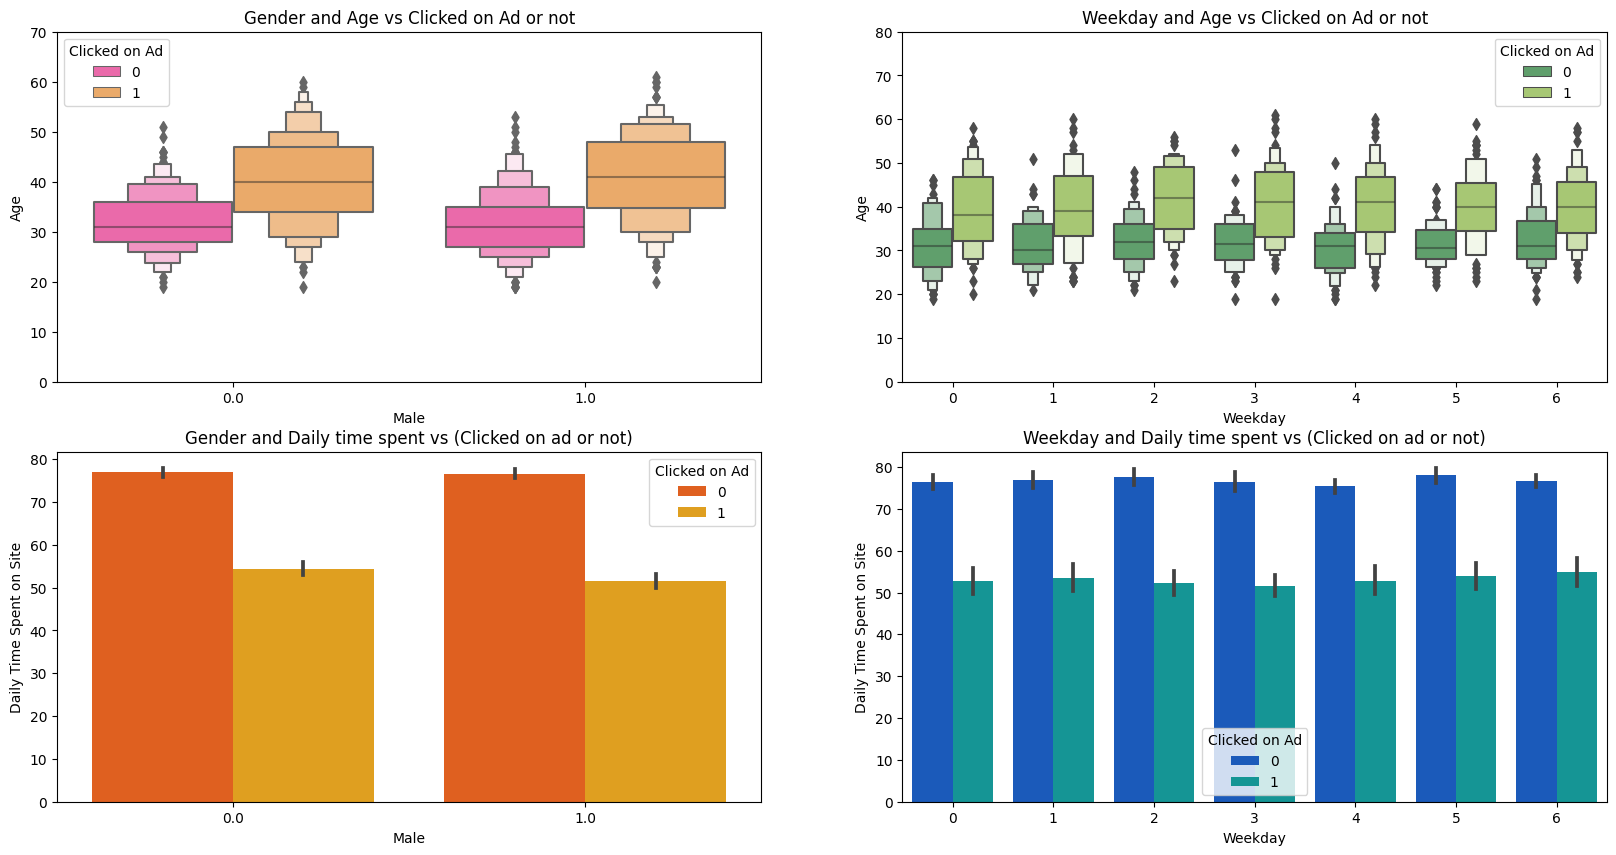

In [ ]:
f,ax=plt.subplots(2,2, figsize=(20,10))

sns.boxenplot(x= "Male",y="Age", hue= "Clicked on Ad", data=data,ax=ax[0,0],palette="spring")
ax[0,0].set_title('Gender and Age vs Clicked on Ad or not')
ax[0,0].set_yticks(range(0,80,10))

sns.boxenplot(x="Weekday",y="Age", hue="Clicked on Ad", data=data,ax=ax[0,1],palette="summer")
ax[0,1].set_title('Weekday and Age vs Clicked on Ad or not')
ax[0,1].set_yticks(range(0,90,10))

sns.barplot(x="Male",y="Daily Time Spent on Site", hue="Clicked on Ad", data=data,ax=ax[1,0],palette="autumn")
ax[1,0].set_title('Gender and Daily time spent vs (Clicked on ad or not)')

sns.barplot(x="Weekday",y="Daily Time Spent on Site", hue="Clicked on Ad", data=data,ax=ax[1,1],palette="winter")
ax[1,1].set_title('Weekday and Daily time spent vs (Clicked on ad or not)')
plt.show()

# Data Correlation

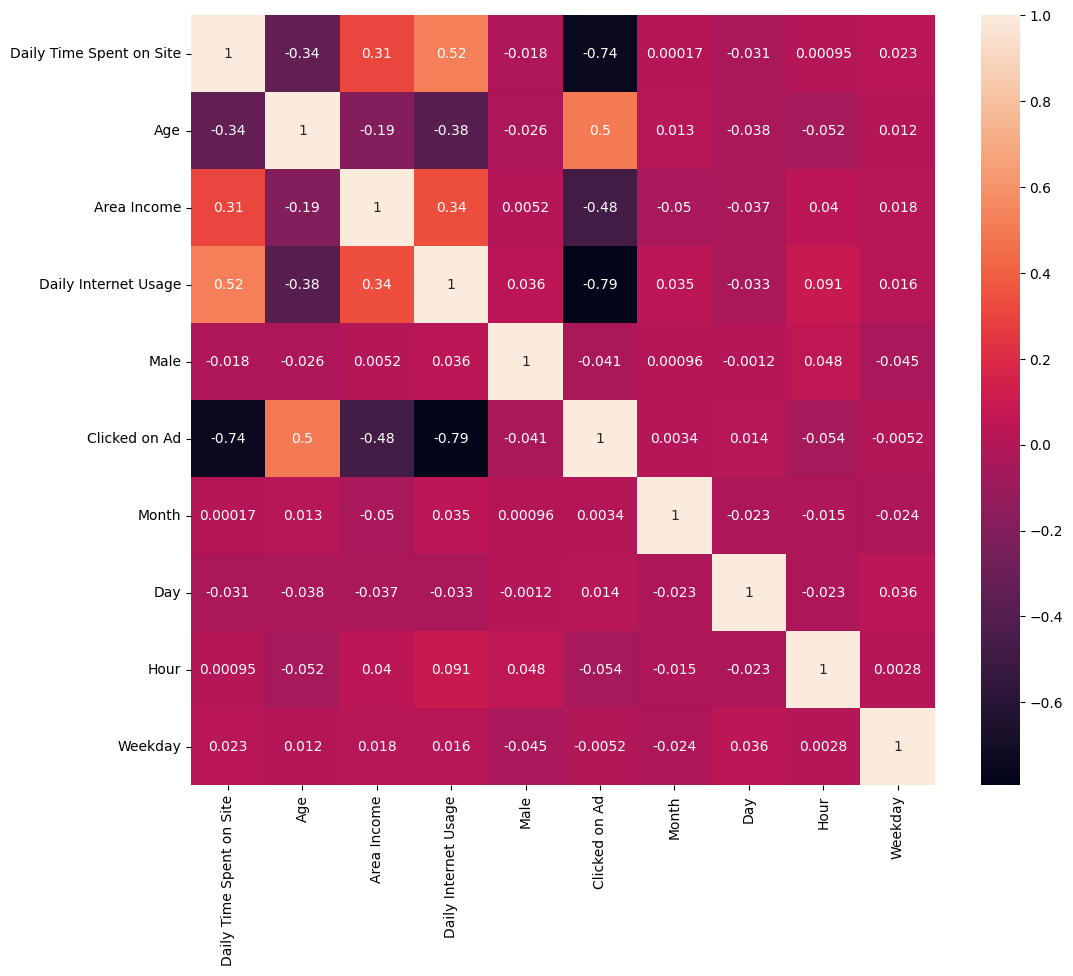

In [ ]:
fig = plt.figure(figsize = (12,10))
corr = data.corr()
sns.heatmap(corr, annot = True)
plt.show()

# Data Splitting

In [ ]:
X = data[['Age','Daily Time Spent on Site','Area Income','Daily Internet Usage']]
Y= data['Clicked on Ad']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=27)
print(X_train.shape,' - ', X_test.shape ,'\n' ,y_train.shape,' - ', y_test.shape)


(667, 4)  -  (286, 4) 
 (667,)  -  (286,)


# Model Evaluation

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix
def model_evaluation(y_pred,y_test):
  a_score = accuracy_score(y_pred,y_test)
  c_report = classification_report(y_pred,y_test)

  print(f'Accuracy Score - {a_score}')
  print(f'Classification Report - \n {c_report}')

  conf_mat = confusion_matrix(y_pred,y_test)
  sns.set_style(style='white')
  plt.figure(figsize=(12,8))
  heatmap = sns.heatmap(conf_mat,vmin=np.min(conf_mat.all()), vmax=np.max(conf_mat), annot=True,fmt='d', annot_kws={"fontsize":20},cmap='Spectral')
  heatmap.set_title('Confusion Matrix Heatmap for \n Ads Click Prediction', fontdict={'fontsize':15}, pad=12)
  heatmap.set_xlabel('Predicted',fontdict={'fontsize':14})
  heatmap.set_ylabel('Actual',fontdict={'fontsize':14})
  heatmap.set_xticklabels(['NO','YES'], fontdict={'fontsize':12})
  heatmap.set_yticklabels(['NO','YES'], fontdict={'fontsize':12})
  plt.show()


# Model Building

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

Accuracy Score - 0.958041958041958
Classification Report - 
               precision    recall  f1-score   support

           0       0.98      0.94      0.96       155
           1       0.93      0.98      0.96       131

    accuracy                           0.96       286
   macro avg       0.96      0.96      0.96       286
weighted avg       0.96      0.96      0.96       286



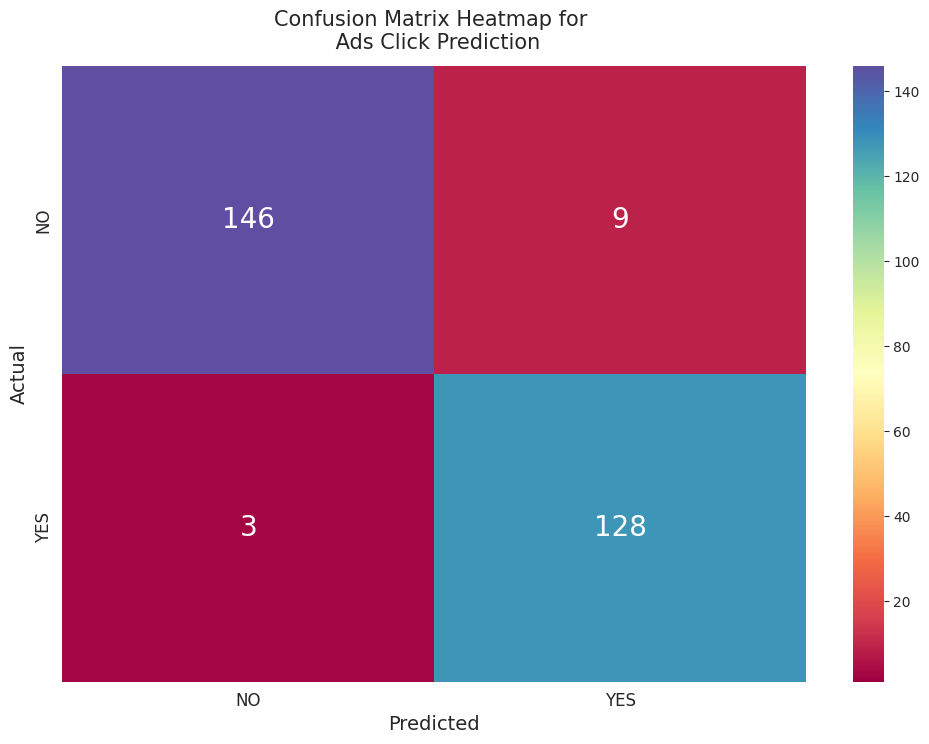

In [ ]:
y_pred = rf.predict(X_test)
model_evaluation(y_pred,y_test)

In [ ]:
joblib.dump(rf,'model.pkl')

['model.pkl']

# Prediction

In [ ]:
model = joblib.load('model.pkl')

data= pd.Series([
    [10,2000,50000,1200],
    [60,2400,54440000,200],
    [17,200,50000,500],
    [17,200,50000,500],
])

predict_outputs = model.predict(list(data))

for predict_output in predict_outputs:
  if predict_output == 0:
    print('Ads Cannot Clicked')
  else:
    print('Ads Can be Clicked')

Ads Cannot Clicked
Ads Can be Clicked
Ads Cannot Clicked
Ads Cannot Clicked


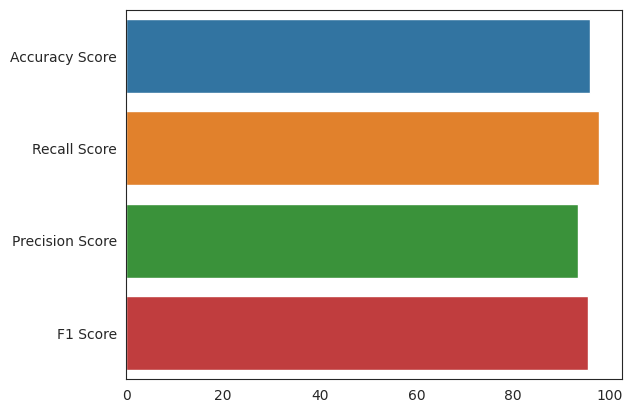

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, classification_report, confusion_matrix

a_score = (accuracy_score(y_pred,y_test) * 100)
r_score = (recall_score(y_pred,y_test)* 100)
p_score = (precision_score(y_pred,y_test)* 100)
f_score = (f1_score(y_pred,y_test)* 100)

y= ['Accuracy Score','Recall Score','Precision Score','F1 Score']

sns.barplot(x=[a_score,r_score,p_score,f_score],y=y)
plt.show()

